# FASHION MNIST CLASSIFICATION

The Fashion MNIST dataset is a popular benchmark dataset in machine learning and computer vision. It consists of a collection of 70,000 grayscale images of fashion products, divided into 60,000 training examples and 10,000 test examples. Each image in the dataset is a 28x28 pixel image, representing a clothing item from one of the following 10 categories:

T-shirt/top

Trouser

Pullover

Dress

Coat

Sandal

Shirt

Sneaker

Bag

Ankle boot


### Let's import the dataset and print out its shape:

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training set shape:", x_train.shape)

print("Test set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


### Plot one sample of each class and also dsitribution of classes in our dataset:

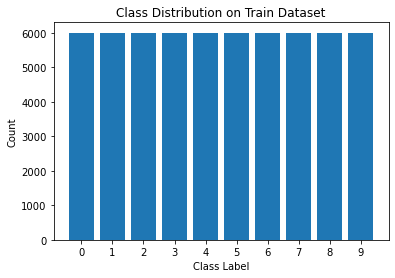

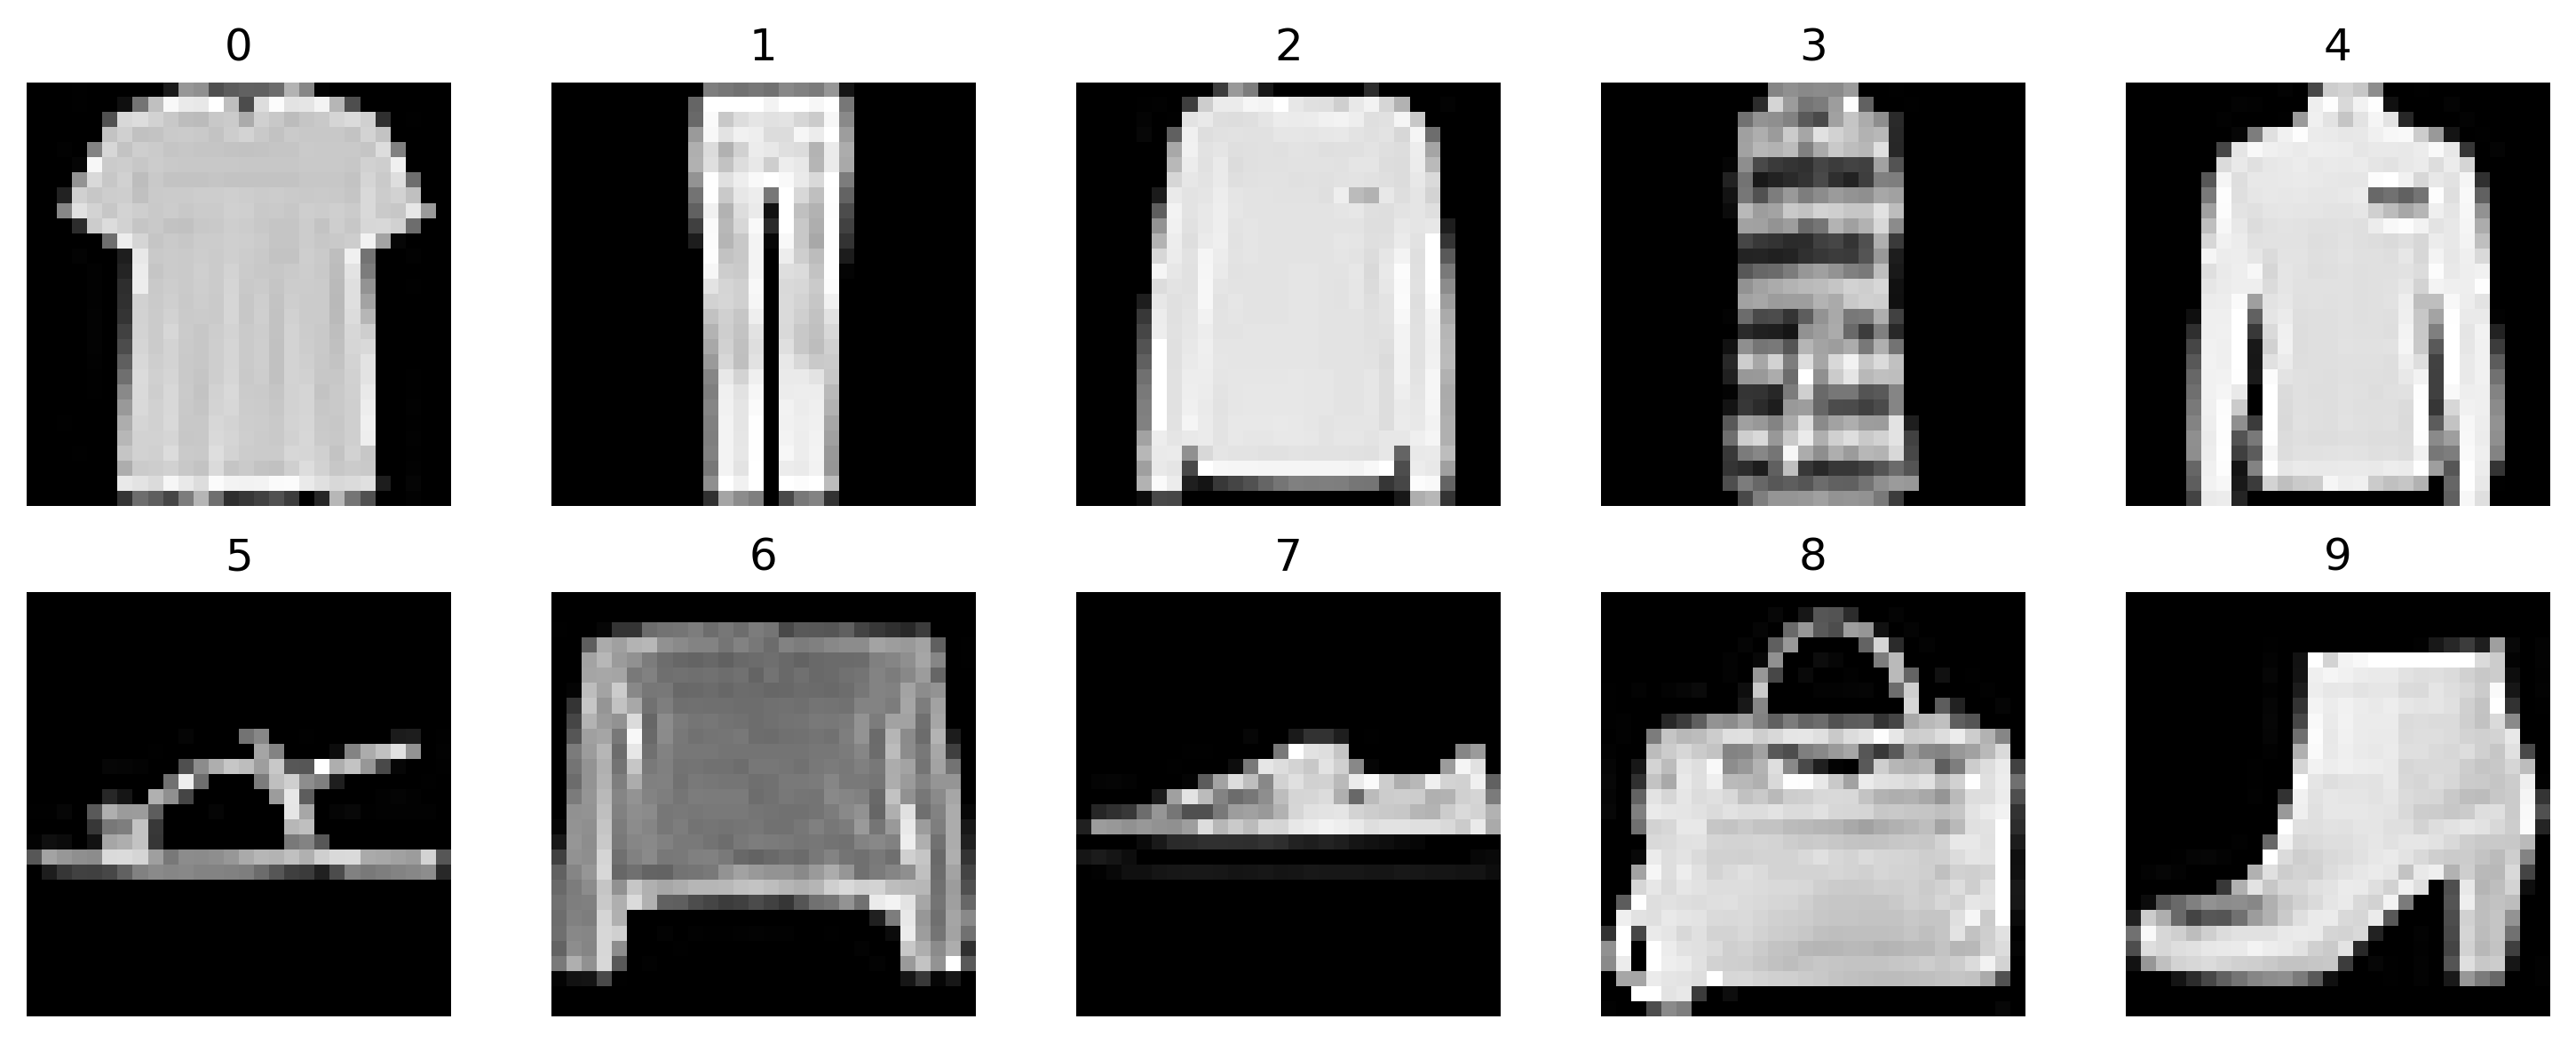

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot the class distribution
class_counts = np.bincount(y_train)
class_labels = list(range(len(class_counts)))
plt.bar(class_labels, class_counts)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(class_labels)
plt.title('Class Distribution on Train Dataset')
plt.show()

# Plot example images from each class
fig, axes = plt.subplots(2, 5, figsize=(10, 4),dpi=300)
axes = axes.ravel()

for i in range(len(class_labels)):
    class_indices = np.where(y_test == i)[0]
    index = np.random.choice(class_indices)
    image = x_test[index]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(i)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


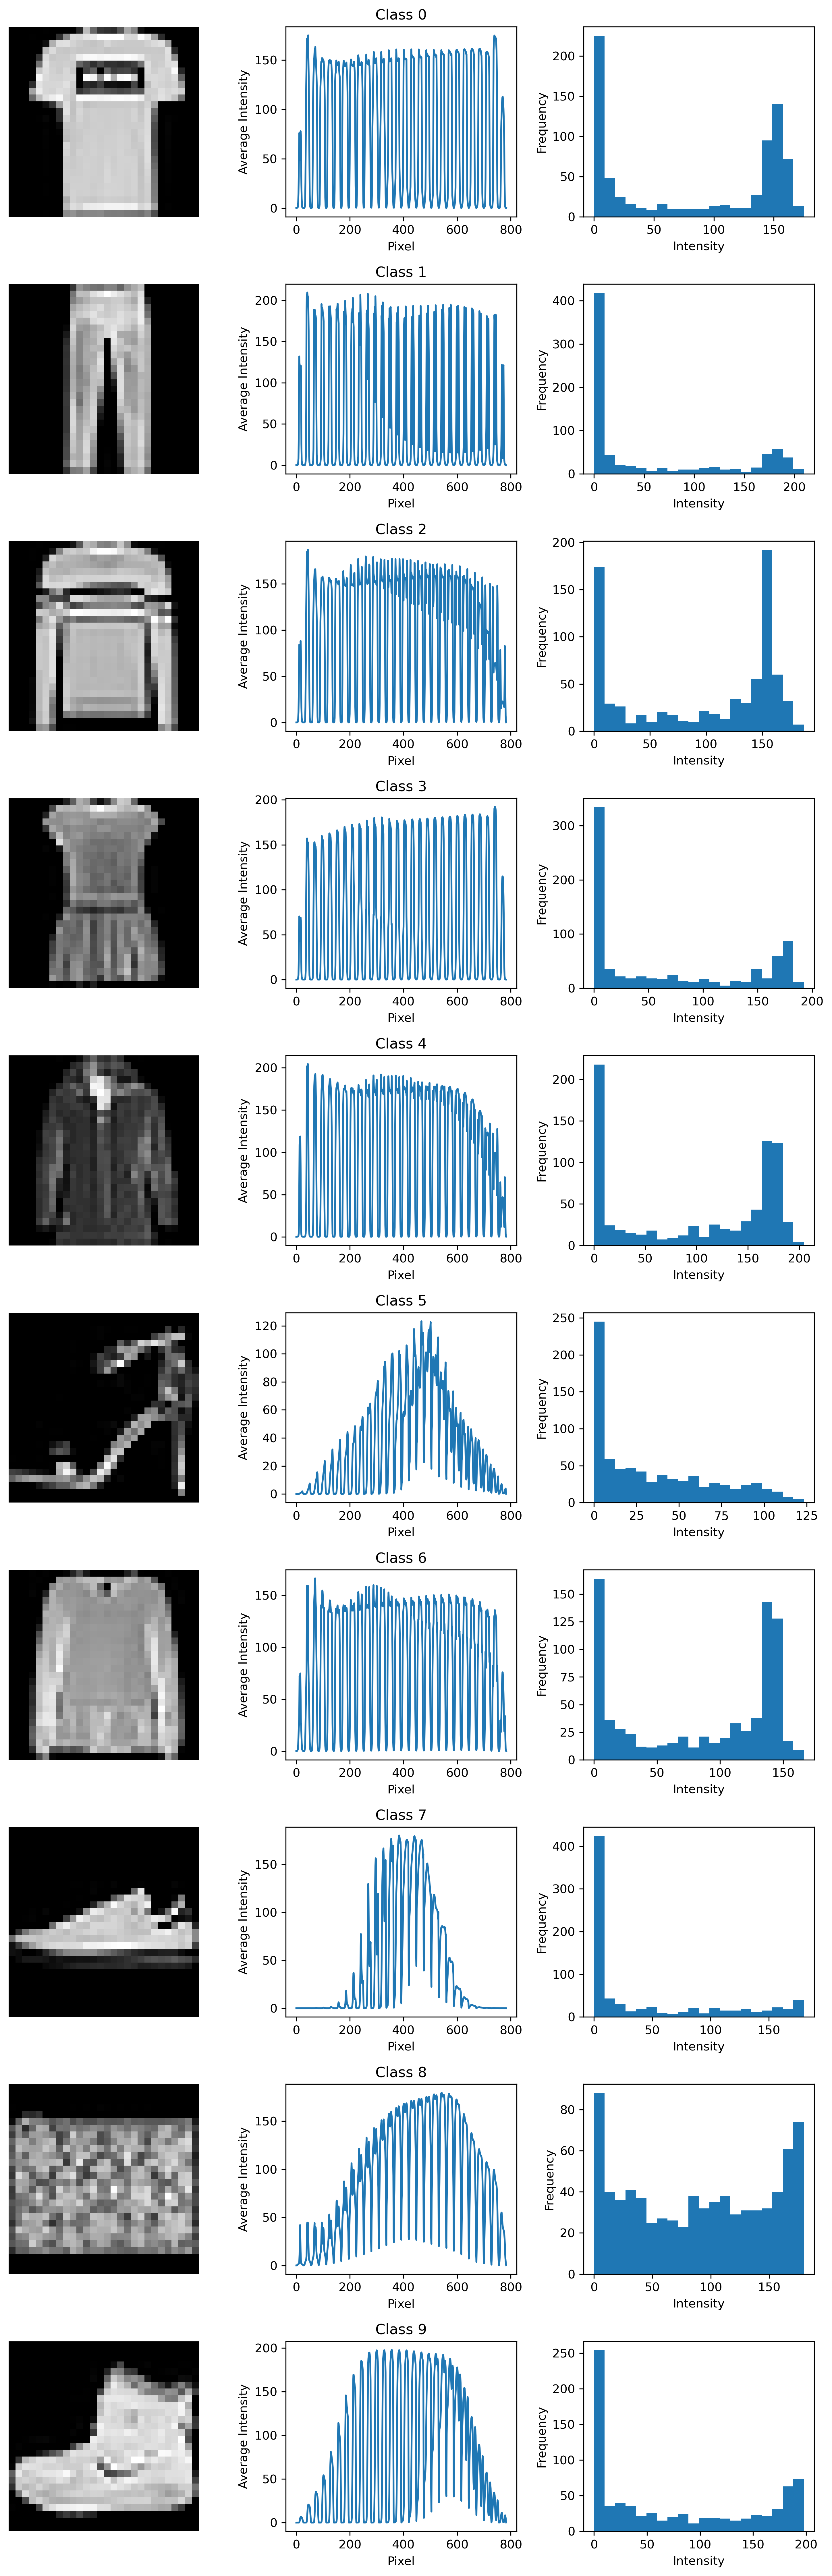

In [7]:
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

x = x.reshape(x.shape[0], -1)

mnist = pd.DataFrame(x)
mnist['label'] = y

fig, axes = plt.subplots(10, 3, figsize=(10, 30),dpi=300)
for i in range(10):
    class_images = mnist[mnist['label'] == i].iloc[:, :-1].values

    # Calculate the average intensity for the class
    avg_intensity = np.mean(class_images, axis=0)

    # Plot the sample image
    sample_img = class_images[0].reshape(28, 28)
    axes[i, 0].imshow(sample_img, cmap='gray')
    axes[i, 0].axis('off')

    # Plot the average intensity graph
    axes[i, 1].plot(avg_intensity)
    axes[i, 1].set_xlabel('Pixel')
    axes[i, 1].set_ylabel('Average Intensity')
    axes[i, 1].set_title('Class {}'.format(i))

    # Plot the intensity histogram
    axes[i, 2].hist(avg_intensity, bins=20)
    axes[i, 2].set_xlabel('Intensity')
    axes[i, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Preprocessing our dataset for SVM. Here, we flatten each image into a vector so that we can feed this into our svm model:

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Reshape the input data to (num_samples, height * width): flattened or vectorized format.
x_train = x_train.reshape(len(x_train), -1)
x_test  = x_test.reshape(len(x_test), -1)

# Scale the input data using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

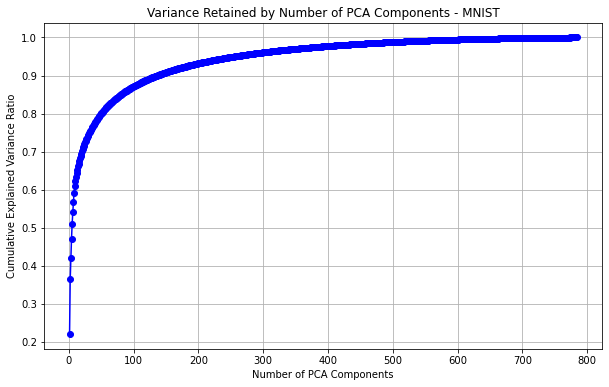

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform PCA
pca = PCA()
pca.fit(x_train)

# Calculate cumulative explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot variance retained by number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Variance Retained by Number of PCA Components - MNIST')
plt.grid(True)
plt.show()

In [25]:
from sklearn.decomposition import PCA
# Perform PCA with desired number of components
n_components = 10  # Number of components for visualization
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x_train)

In [26]:
# Train the SVM classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_pca, y_train)

SVC(random_state=42)

In [27]:
import numpy as np
# Define the mesh grid
h = 0.02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [28]:
# Obtain the predicted class labels
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ValueError: X has 2 features, but SVC is expecting 10 features as input.

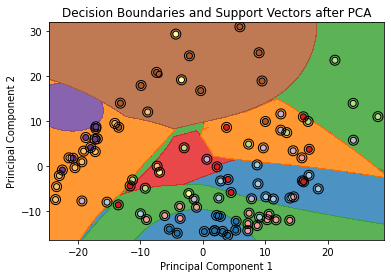

In [10]:
# Plot decision boundaries and support vectors
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

# Plot support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k')

# Set plot labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries and Support Vectors after PCA')

# Show the plot
plt.show()

### Investigate performace of each kernel to pick the best one for further optimization:

In [29]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel)

    #cross-validation
    scores = cross_val_score(svm, x_train, y_train, cv=5)

    # average accuracy for the kernel
    print(f"Kernel: {kernel}, Average Accuracy: {scores.mean():.2f}")


Kernel: linear, Average Accuracy: 0.79
Kernel: poly, Average Accuracy: 0.70
Kernel: rbf, Average Accuracy: 0.79
Kernel: sigmoid, Average Accuracy: 0.78


### While Linear Kernel do a good job kernel = 'rbf' outperforms all the other kernels so let us hypertune rbf kernel so we continue with this kernel. 

### Let's take a look at the classification reports so see performance in each class:

In [58]:
from sklearn.metrics import classification_report

# Fit the SVM classifier with the best parameters
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       200
           1       0.98      0.94      0.96       203
           2       0.76      0.71      0.73       214
           3       0.80      0.87      0.84       190
           4       0.75      0.74      0.75       219
           5       0.92      0.87      0.89       195
           6       0.57      0.54      0.55       197
           7       0.87      0.91      0.89       200
           8       0.88      0.95      0.92       194
           9       0.89      0.88      0.89       188

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



### We have lowest performance in class 2,4, and 6 while we have the best performance in class1.


### Let us fine tune SVM through a grid search

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1,1,10],
    'gamma': [0.1, 1,10]
}
# Create an SVM classifier with RBF kernel
svm = SVC(kernel='rbf')

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(x_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'gamma': 0.1}


In [59]:
# Fit the SVM classifier with the best parameters
svm = SVC(kernel='rbf', C=10)
history = svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       200
           1       0.97      0.96      0.96       203
           2       0.75      0.77      0.76       214
           3       0.85      0.83      0.84       190
           4       0.77      0.75      0.76       219
           5       0.93      0.93      0.93       195
           6       0.60      0.62      0.61       197
           7       0.90      0.94      0.92       200
           8       0.92      0.95      0.93       194
           9       0.94      0.89      0.92       188

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



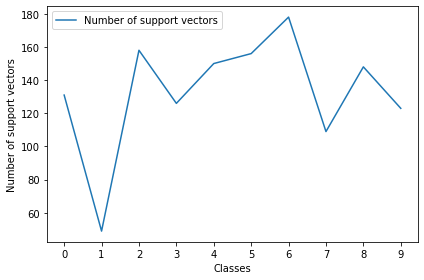

In [62]:
# Plot the training history
plt.figure(figsize=(6, 4))
plt.plot(history.n_support_, label='Number of support vectors')
plt.xlabel('Classes')
plt.ylabel('Number of support vectors')
plt.xticks(range(len(history.n_support_)), class_labels)
plt.legend()
plt.tight_layout()
plt.show()

### We can see that model performance is imporoved a couple of percentage.

### Let us draw a confusion matrix to see performance by class 

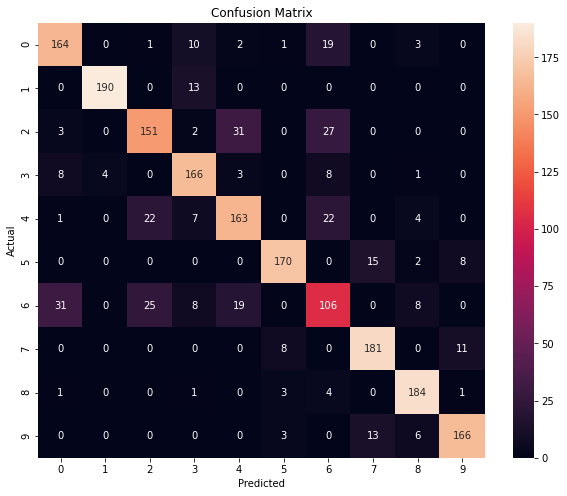

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

cm = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(10, 8))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### We have lowest performance in class 2,4, and 6 while we have the best performance in class1.

### Let us take a look at ROC curve to further investigage Model Performance:

In [25]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

svm = SVC(kernel='rbf', probability=True, C = 10)
svm.fit(x_train, y_train)

y_scores = svm.predict_proba(x_test)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

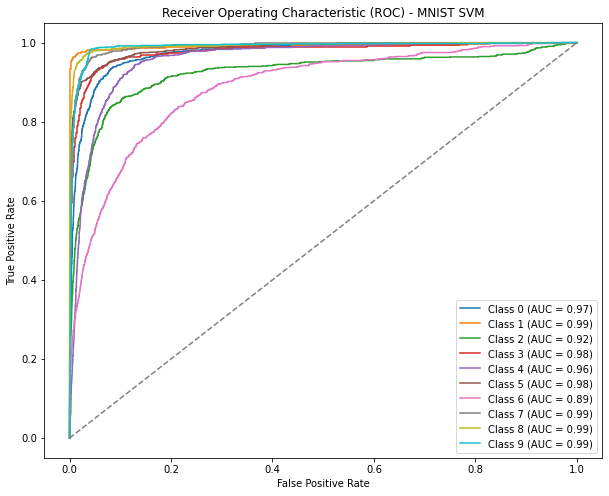

In [27]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model = OneVsRestClassifier(SVC(probability=True))
model.fit(x_train, y_train)

y_pred_proba = model.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    class_label = model.classes_[i]
    y_true = np.where(y_test == class_label, 1, 0)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true, y_pred_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

plt.figure(figsize=(10, 8))
for class_label in model.classes_:
    plt.plot(fpr[class_label], tpr[class_label], label=f"Class {class_label} (AUC = {roc_auc[class_label]:.2f})")

plt.plot([0, 1], [0, 1], '--', color='gray')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - MNIST SVM')
plt.legend(loc='lower right')
plt.show()

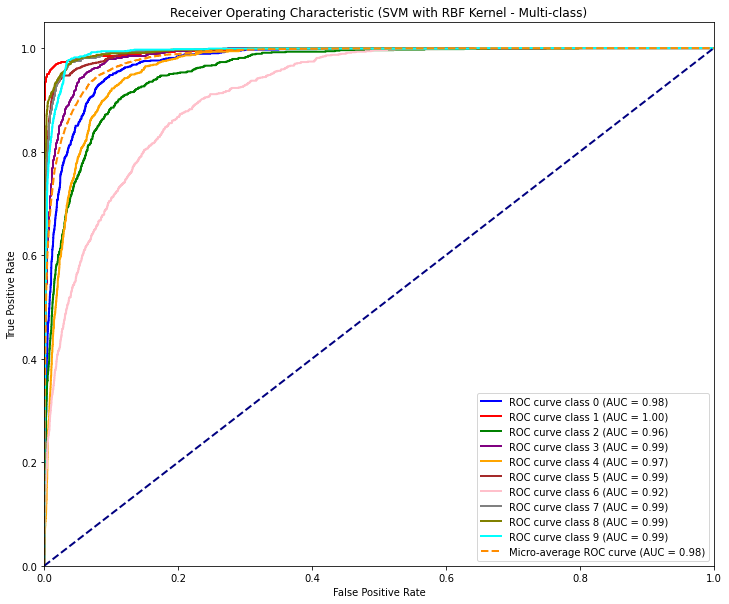

In [14]:
import matplotlib.pyplot as plt
# Plot the ROC curves for each class
plt.figure(figsize=(12,10))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, linestyle='--', label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc_micro))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM with RBF Kernel - Multi-class)')
plt.legend(loc="lower right")
plt.show()

### Let us take a look at Precission and Recall:

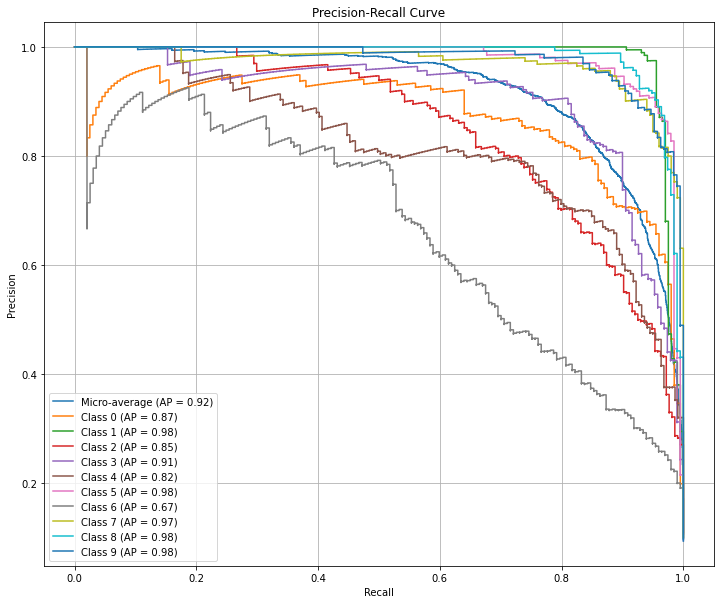

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

num_classes = 10

y_scores = svm.predict_proba(x_test)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

precision = dict()
recall = dict()
avg_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_scores[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
avg_precision["micro"] = average_precision_score(y_test_bin, y_scores, average="micro")

plt.figure(figsize=(12,10))
plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average (AP = {0:0.2f})'.format(avg_precision['micro']))
for i in range(num_classes):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP = {1:0.2f})'.format(i, avg_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# Visulizations of different Aspects of SVM:

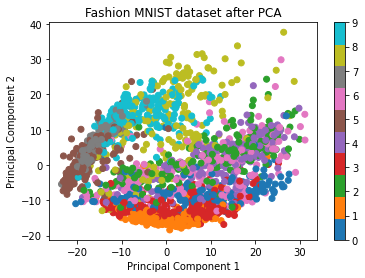

In [12]:
# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

# Plot the reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Fashion MNIST dataset after PCA')
plt.colorbar()
plt.show()

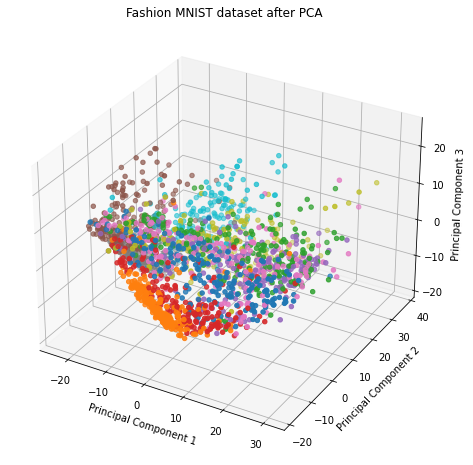

In [11]:
# Apply PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(x_train)

# Plot the reduced data in 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train, cmap='tab10')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Fashion MNIST dataset after PCA')
plt.show()

Accuracy: 0.813


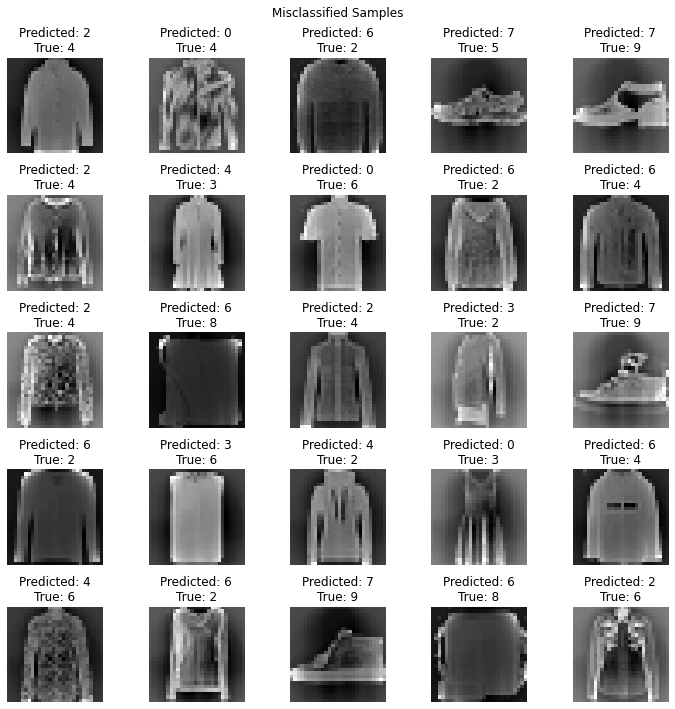

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_test)

model = SVC(kernel='linear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

misclassified_indices = np.where(y_test != y_pred)[0]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):
    idx = misclassified_indices[i]
    img = x_test[idx].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Predicted: {y_pred[idx]}\nTrue: {y_test[idx]}')
    axes[i].axis('off')

plt.suptitle('Misclassified Samples')
plt.tight_layout()
plt.show()



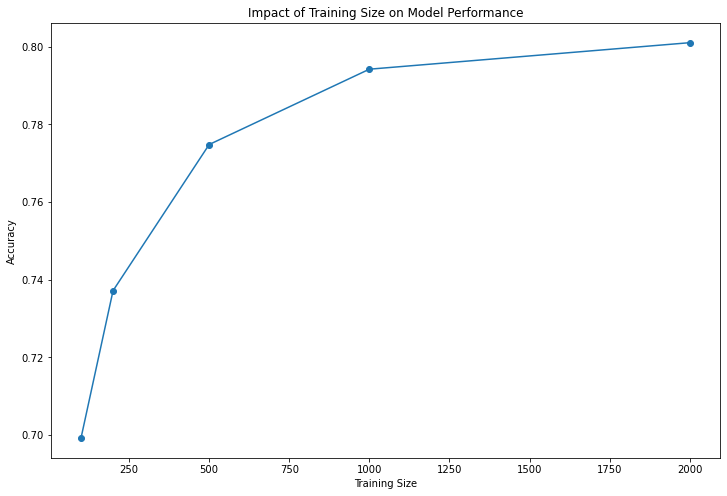

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

fashion_mnist = datasets.fetch_openml('Fashion-MNIST', version=1, as_frame=False, parser='auto')
X = fashion_mnist.data
y = fashion_mnist.target

training_sizes = [100, 200, 500, 1000, 2000]

accuracies = []

for size in training_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)

    model = SVC(kernel='linear')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs training size
plt.figure(figsize=(12, 8))
plt.plot(training_sizes, accuracies, marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Impact of Training Size on Model Performance')
plt.show()


# CNN IMPLEMENTATION

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the data to fit the CNN input shape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [43]:
# Define the number of samples to load
num_samples = 2000

# Load a partial subset of the data
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]
x_test = x_test[:num_samples]
y_test = y_test[:num_samples]

In [9]:
# Create the CNN model

# This line initializes a new Sequential model object, which is a linear stack of layers.
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Epoch 1/10
469/469 [==============================] - 32s 65ms/step - loss: 0.5864 - accuracy: 0.7861 - val_loss: 0.3961 - val_accuracy: 0.8571
Epoch 2/10
469/469 [==============================] - 35s 75ms/step - loss: 0.3707 - accuracy: 0.8656 - val_loss: 0.3376 - val_accuracy: 0.8751
Epoch 3/10
469/469 [==============================] - 38s 80ms/step - loss: 0.3209 - accuracy: 0.8836 - val_loss: 0.3138 - val_accuracy: 0.8843
Epoch 4/10
469/469 [==============================] - 35s 74ms/step - loss: 0.2902 - accuracy: 0.8931 - val_loss: 0.3071 - val_accuracy: 0.8880
Epoch 5/10
469/469 [==============================] - 34s 73ms/step - loss: 0.2675 - accuracy: 0.9022 - val_loss: 0.2865 - val_accuracy: 0.8969
Epoch 6/10
469/469 [==============================] - 35s 75ms/step - loss: 0.2513 - accuracy: 0.9074 - val_loss: 0.2655 - val_accuracy: 0.9012
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.2331 - accuracy: 0.9144 - val_loss: 0.2595 - val_accuracy:

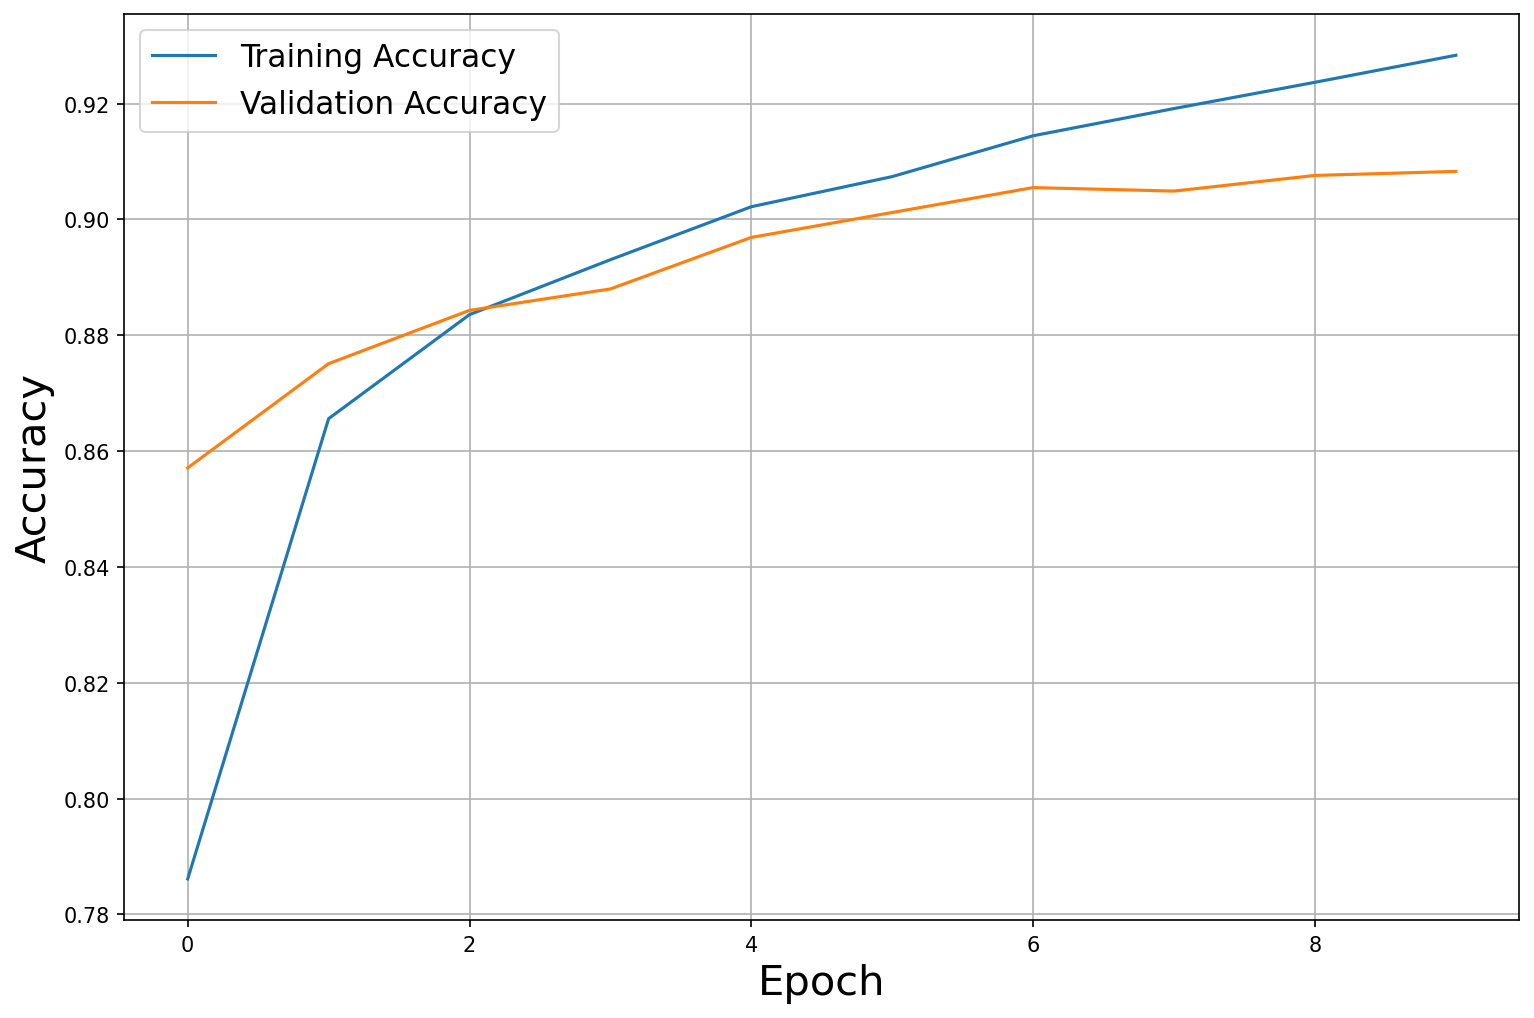

In [19]:
# Plot the training history
plt.figure(figsize=(12, 8), dpi=150)
#plt.subplot(1, 2, 1)
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize= 20)
plt.ylabel('Accuracy',fontsize= 20)
plt.legend(fontsize= 15)
plt.grid(True)
#plt.tight_layout()
plt.show()

In [15]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_pred_prob = model.predict(x_test)

y_test_bin = label_binarize(y_test, classes=list(range(10)))


fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

63/63 [==============================] - 1s 9ms/step


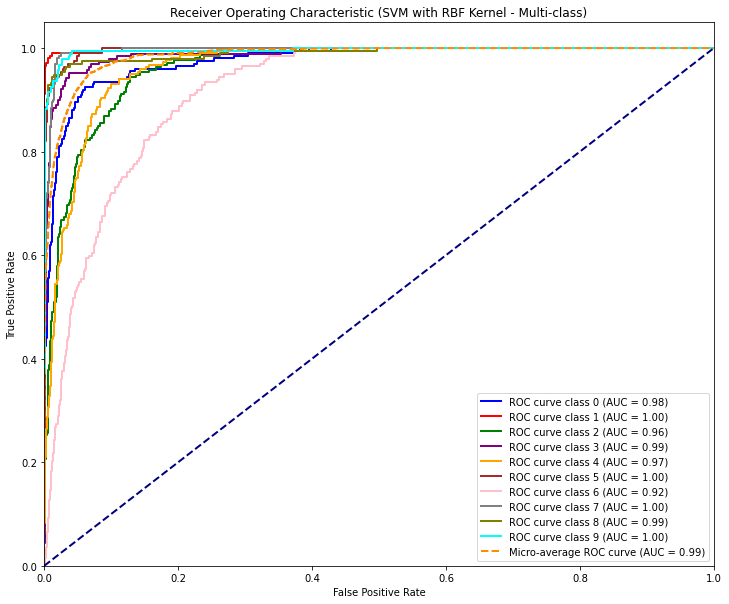

In [16]:
plt.figure(figsize=(12,10))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, linestyle='--', label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc_micro))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM with RBF Kernel - Multi-class)')
plt.legend(loc="lower right")
plt.show()

63/63 [==============================] - 1s 8ms/step


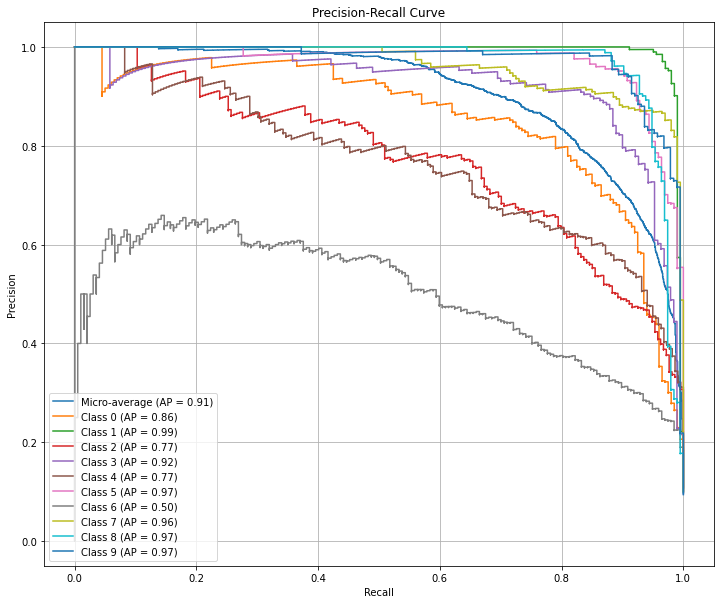

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

num_classes = 10

# Obtain predicted probabilities for each class
y_scores = model.predict(x_test)

# Binarize the true labels and predicted probabilities
y_test_bin = label_binarize(y_test, classes=list(range(10)))

precision = dict()
recall = dict()
avg_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_scores[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
avg_precision["micro"] = average_precision_score(y_test_bin, y_scores, average="micro")

plt.figure(figsize=(12,10))
plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average (AP = {0:0.2f})'.format(avg_precision['micro']))
for i in range(num_classes):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP = {1:0.2f})'.format(i, avg_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
